# Aerofit Business Case Study

Aerofit, a leading fitness equipment company, is seeking to enhance its understanding of the characteristics of the target audience for each type of treadmill in their product range. The goal is to provide more personalized recommendations to new customers based on their specific demographics and preferences. The company aims to investigate whether there are significant differences in customer characteristics across different treadmill types.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importing dataset and usual data analysis steps like checking the structure & characteristics of the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/Data sets/aerofit_treadmill.txt')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

In [ ]:
df.ndim

2

In [ ]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- This dataset has 2 dimensional data with 9 columns and 180 rows.
- No Null Values.

In [ ]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


- There are 3 unique products. KP281 is the most bought product (80) among the 3.
- Out of 180 customers, 104 are Male and 76 are female.
- 107 customers are married out of 180.
- Age range of customers in this data is 18 - 50. Average age of customers is 28.778, while median of age is 26. We can say there are outliers in the dataset.
- Most of the customers have education of 16. 75% of customers have education less than 16.
- Average income of customers is 53719.58 which is highert than it's median of 50596.50
- 75% of customers have half the income of highest Income.
- Average Miles is 103.19 which is higher than it's median of 94.
- We can see that standard deviation for Income and Miles is very high. They have outliers

# Grouping necessary data

Grouping of age column

In [ ]:
# creating a function to convert age to age group
def agegroup(age):
  if age >= 18 and age <= 30:
    return('Young')
  elif age >30 and age <= 40:
    return('Mid-age')
  elif age > 40:
    return('Adult')

In [ ]:
df['AgeGroup'] = df['Age'].apply(agegroup)

In [ ]:
df['AgeGroup'].nunique()

3

In [ ]:
df['AgeGroup'].value_counts()

Young      120
Mid-age     48
Adult       12
Name: AgeGroup, dtype: int64

- Datatset contains more Young customers.

Grouping of Income Column

In [ ]:
df['Income'].min(), df["Income"].max()

(29562, 104581)

In [ ]:
income_label = ['low', 'medium', 'high']
df['IncomeGroup'] = pd.cut(df['Income'], bins = 3, labels = income_label)

In [ ]:
df[df['IncomeGroup']== 'high']['Income'].min(), df[df['IncomeGroup']== 'high']['Income'].max()

(83416, 104581)

In [ ]:
df[df['IncomeGroup']== 'medium']['Income'].min(), df[df['IncomeGroup']== 'medium']['Income'].max()

(54576, 77191)

In [ ]:
df[df['IncomeGroup']== 'low']['Income'].min(), df[df['IncomeGroup']== 'low']['Income'].max()

(29562, 53536)

Grouping Miles column

In [ ]:
mile_label = ['low', 'medium', 'high']
df['MilesGroup'] = pd.cut(df['Miles'], bins = 3, labels = mile_label)

In [ ]:
df.Miles.min(), df.Miles.max()

(21, 360)

In [ ]:
df[df['MilesGroup']== 'low']['Miles'].min(), df[df['MilesGroup']== 'low']['Miles'].max()

(21, 132)

In [ ]:
df[df['MilesGroup']== 'medium']['Miles'].min(), df[df['MilesGroup']== 'medium']['Miles'].max()

(140, 240)

In [ ]:
df[df['MilesGroup']== 'high']['Miles'].min(), df[df['MilesGroup']== 'high']['Miles'].max()

(260, 360)

In [ ]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,IncomeGroup,MilesGroup
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000,180,180,180
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN,3,3,3
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,Young,low,low
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN,120,117,145
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444,NaN,NaN,NaN
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605,NaN,NaN,NaN
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000,NaN,NaN,NaN
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000,NaN,NaN,NaN
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000,NaN,NaN,NaN
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000,NaN,NaN,NaN


- 69 out of 180 customers are planning to use treadmill 3 days a week
- 97 out of 180 customers are in the Fitness score of 3
- Majority of customers (85) have education of 16 years
- 120 customers are in Young age group
- Majority of customers are in low income and low miles group.

#Visual analysis

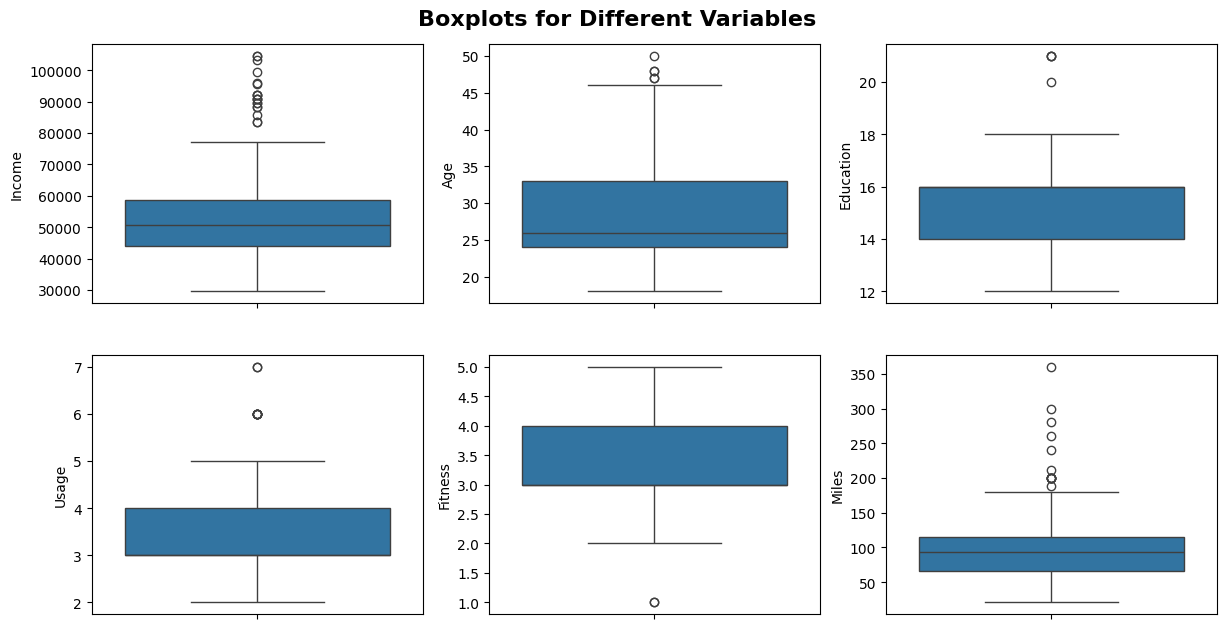

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(6, 5))
fig.subplots_adjust(top=1.25, right = 2)

sns.boxplot(df.Income, ax = axis[0,0])
sns.boxplot(df.Age, ax = axis[0,1])
sns.boxplot(df.Education, ax = axis[0,2])
sns.boxplot(df.Usage, ax = axis[1,0])
sns.boxplot(df.Fitness, ax = axis[1,1])
sns.boxplot(df.Miles, ax = axis[1,2])

plt.suptitle('Boxplots for Different Variables', fontsize=16, weight='bold', x=1, y=1.32)
plt.show()

In the boxplot we can see,

- Income and Miles have more outliers
- Age, Education, Usage & Fitness have fewer outliers

Text(1, 1.32, 'Countplot for Different Variables')

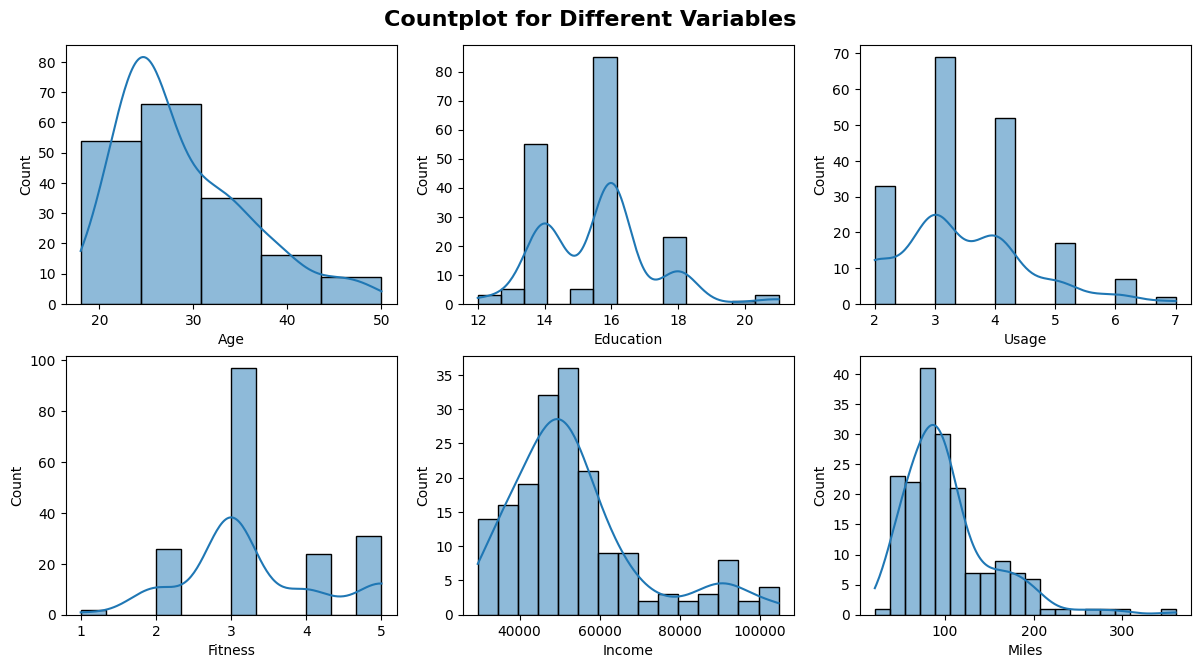

In [ ]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (6,5))
fig.subplots_adjust(top=1.25, right = 2)

sns.histplot(data = df, x = 'Age', kde = True, ax = axis [0,0], bins = 5)
sns.histplot(data = df, x = 'Education', kde = True, ax = axis [0,1])
sns.histplot(data = df, x = 'Usage', kde = True, ax = axis [0,2])
sns.histplot(data = df, x = 'Fitness', kde = True, ax = axis [1,0])
sns.histplot(data = df, x = 'Income', kde = True, ax = axis [1,1])
sns.histplot(data = df, x = 'Miles', kde = True, ax = axis [1,2])

plt.suptitle('Countplot for Different Variables', fontsize=16, weight='bold', x=1, y=1.32)

- Majority of customers have Miles between 20-120.
- Majority of customers income is between 30k-60k.
- Majority of customers have fitness of 3.
- Majority of customers have Usage of 3.
- Majority of customers have education 16.
- Majority of customers are of age 18-30.


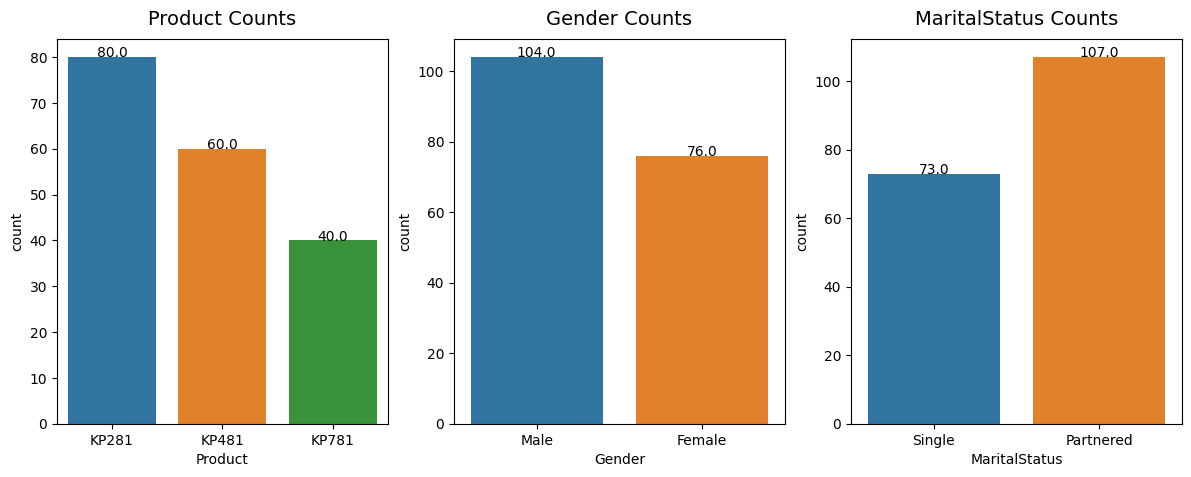

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 5))
plt.subplots_adjust(right=2)

# Plot the countplots
sns.countplot(data=df, x='Product', ax=axes[0], hue = 'Product')
sns.countplot(data=df, x='Gender', ax=axes[1], hue = 'Gender')
sns.countplot(data=df, x='MaritalStatus', ax=axes[2], hue = 'MaritalStatus')

axes[0].set_title("Product Counts", pad=10, fontsize=14)
axes[1].set_title("Gender Counts", pad=10, fontsize=14)
axes[2].set_title("MaritalStatus Counts", pad=10, fontsize=14)

# Annotate each bar with its count
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline')

plt.show()


- KP281 is the most bought product from this data.
- There are more Male customers than females.
- Partnered customers are more in this data.

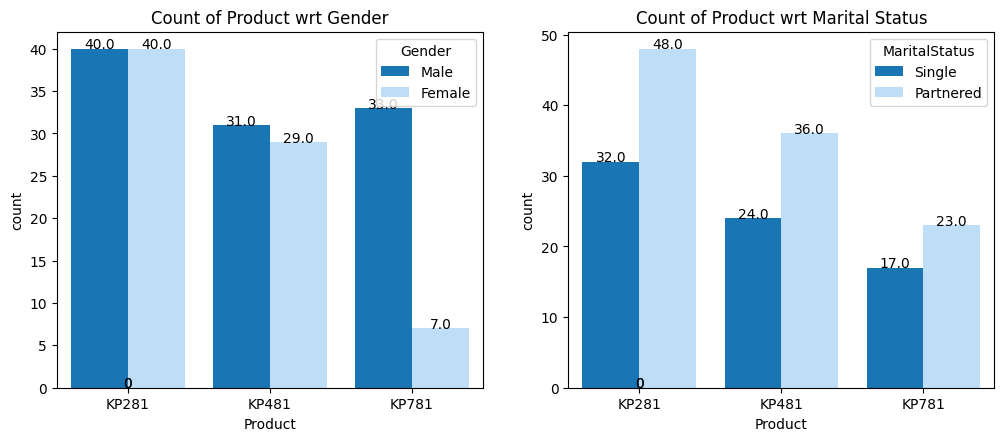

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 4))
fig.subplots_adjust(top = 1, right = 2)

sns.countplot(data = df, x = "Product", hue = 'Gender', ax = axes [0], palette = ["#007ACC", "#B4E0FF"])
sns.countplot(data = df, x = "Product", hue = 'MaritalStatus', ax = axes [1], palette = ["#007ACC", "#B4E0FF"])

# Annotate each bar with its count
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline')

axes[0].set_title('Count of Product wrt Gender')
axes[1].set_title('Count of Product wrt Marital Status')

plt.show()

**Product & Gender**
- Equal number of male and female customers have bought KP281, almost the same for KP481.
- Most of the customers who purchased KP781 are Male.

**Product & Marital Status**
- Across all the products, partnered customers have bought more than the single cutsomers.
- Partnered customers are more likely to purchase a product.


<Axes: xlabel='Income', ylabel='Miles'>

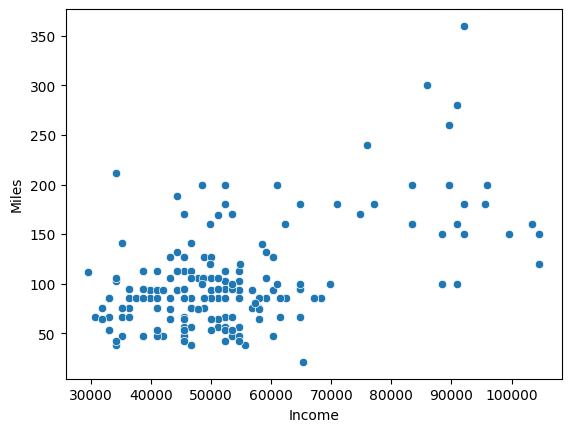

In [ ]:
sns.scatterplot(data = df, x = 'Income', y = 'Miles')

<ipython-input-217-22fc40081a3c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues', annot = True)


Text(0.5, 1.0, 'Correlation between variables')

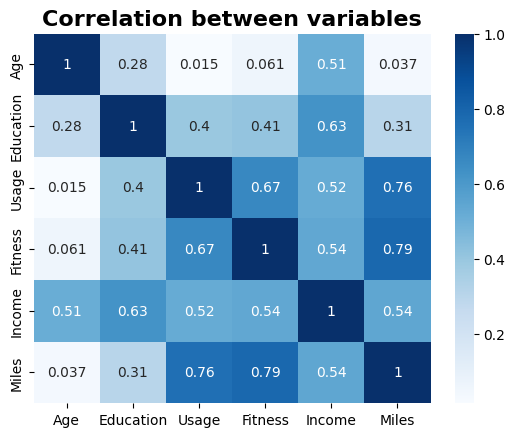

In [ ]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.title('Correlation between variables', fontsize = 16, weight = 'bold')

- Age has very negligible correlation with all the other variables except Income.
- Education has the highest correlation with income.
- Usage has least correlation with age. It is highly correlated with Miles.
- Fitness is also highly correlated with Miles.
- Income is almost equally correlated with all the variables.

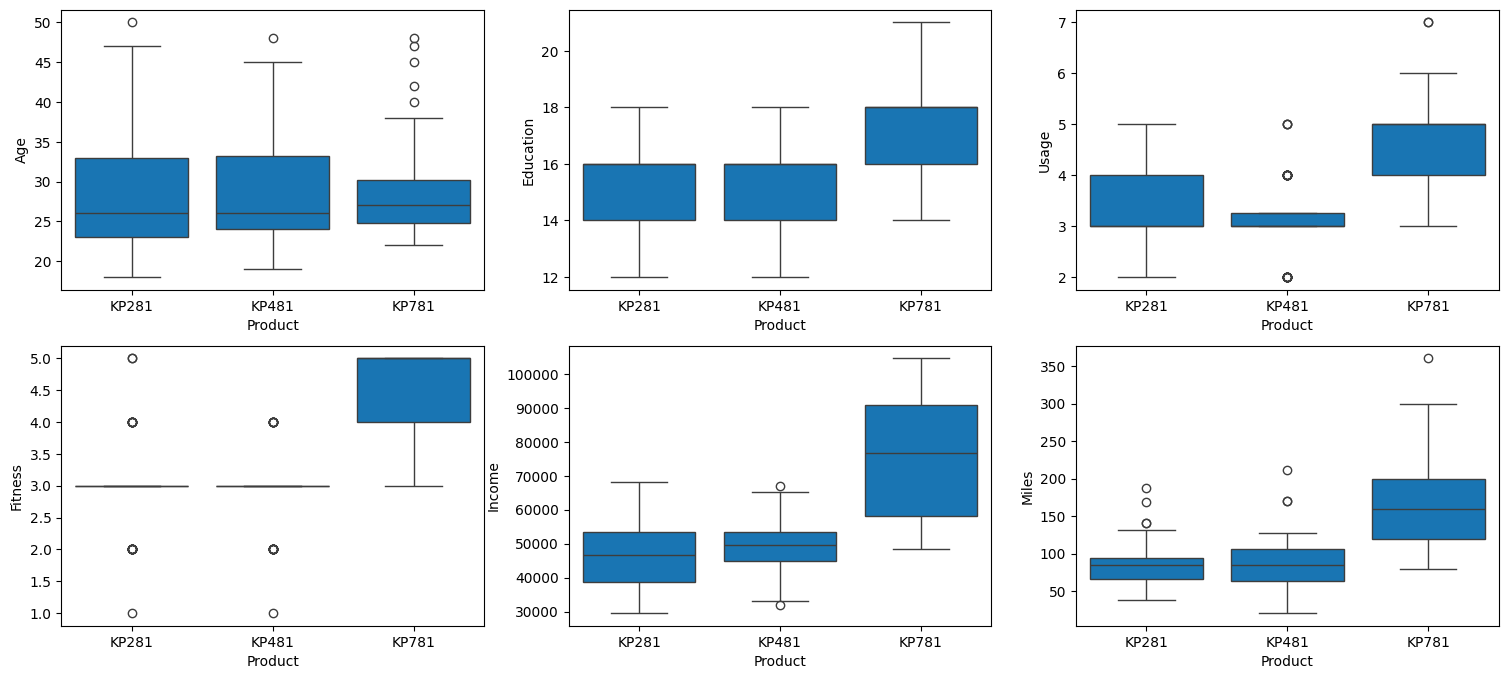

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (5,8))
plt.subplots_adjust(right = 3)

sns.boxplot(data=df, x='Product', y = 'Age', color = "#007ACC", ax = axes [0, 0])
sns.boxplot(data=df, x='Product', y = 'Education', color = "#007ACC", ax = axes [0, 1])
sns.boxplot(data=df, x='Product', y = 'Usage', color = "#007ACC", ax = axes [0, 2])
sns.boxplot(data=df, x='Product', y = 'Fitness', color = "#007ACC", ax = axes [1, 0])
sns.boxplot(data=df, x='Product', y = 'Income', color = "#007ACC", ax = axes [1, 1])
sns.boxplot(data=df, x='Product', y = 'Miles', color = "#007ACC", ax = axes [1, 2])
plt.show()

**Age & Product**
- Median age for both KP281 & KP481 is the same.
- Customers with age between 25-30 are more likely to buy KP781.

**Education & Product**
- Customers with education between 14 & 16 are equally likely to buy KP281 & KP 481.
- Customers with education between 16 & 18 are more likely to buy KP781.

**Usage & Product**
- Customers who are planning to use treadmill more than 4 days a week are more likely to buy KP781.
- KP281 is more likely to be bought by customer with usage between 3 & 4 days.
- KP481 has the highest probability of being purchased by usage of 3 days.

**Fitness & Product**
- Customers with fitness score of 3 are equally likely to buy KP281 & KP481.
- CUstomers with fitness score more than 3 have higher chances of buying KP781.

**Income & Product**
- Customers with income >= 60000 are higly likely to buy KP781.

**Miles & Product**
- Customers with miles>100 are more likely to buy KP781.
- Customers with miles <=100 are equally likely to buy KP281 & KP481.

# Product KP281

In [ ]:
df[df.Product == 'KP281']['Gender'].value_counts(normalize = True)

Male      0.5
Female    0.5
Name: Gender, dtype: float64

In [ ]:
df[df.Product == 'KP281']['AgeGroup'].value_counts(normalize = True)

Young      0.6875
Mid-age    0.2375
Adult      0.0750
Name: AgeGroup, dtype: float64

In [ ]:
df[df.Product == 'KP281']['Education'].value_counts(normalize = True)

16    0.4875
14    0.3750
15    0.0500
13    0.0375
12    0.0250
18    0.0250
Name: Education, dtype: float64

In [ ]:
df[df.Product == 'KP281']['MaritalStatus'].value_counts(normalize = True)

Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

In [ ]:
df[df.Product == 'KP281']['Usage'].value_counts(normalize = True)

3    0.4625
4    0.2750
2    0.2375
5    0.0250
Name: Usage, dtype: float64

In [ ]:
df[df.Product == 'KP281']['Fitness'].value_counts(normalize = True)

3    0.6750
2    0.1750
4    0.1125
5    0.0250
1    0.0125
Name: Fitness, dtype: float64

In [ ]:
df[df.Product == 'KP281']['IncomeGroup'].value_counts(normalize = True)

low       0.775
medium    0.225
high      0.000
Name: IncomeGroup, dtype: float64

In [ ]:
df[df.Product == 'KP281']['MilesGroup'].value_counts(normalize = True)

low       0.95
medium    0.05
high      0.00
Name: MilesGroup, dtype: float64

- For Product KP281, Young partnered male & female with low income, low miles of walk, education of 16 years, weekly treadmill usage goal of 3 days and fitness score of 3 have the highest probable buyers.

# Product KP481

In [ ]:
df[df.Product == 'KP481']['Gender'].value_counts(normalize = True)

Male      0.516667
Female    0.483333
Name: Gender, dtype: float64

In [ ]:
df[df.Product == 'KP481']['AgeGroup'].value_counts(normalize = True)

Young      0.583333
Mid-age    0.383333
Adult      0.033333
Name: AgeGroup, dtype: float64

In [ ]:
df[df.Product == 'KP481']['Education'].value_counts(normalize = True)

16    0.516667
14    0.383333
13    0.033333
18    0.033333
12    0.016667
15    0.016667
Name: Education, dtype: float64

In [ ]:
df[df.Product == 'KP481']['MaritalStatus'].value_counts(normalize = True)

Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

In [ ]:
df[df.Product == 'KP481']['Usage'].value_counts(normalize = True)

3    0.516667
2    0.233333
4    0.200000
5    0.050000
Name: Usage, dtype: float64

In [ ]:
df[df.Product == 'KP481']['Fitness'].value_counts(normalize = True)

3    0.650000
2    0.200000
4    0.133333
1    0.016667
Name: Fitness, dtype: float64

In [ ]:
df[df.Product == 'KP481']['IncomeGroup'].value_counts(normalize = True)

low       0.783333
medium    0.216667
high      0.000000
Name: IncomeGroup, dtype: float64

In [ ]:
df[df.Product == 'KP481']['MilesGroup'].value_counts(normalize = True)

low       0.95
medium    0.05
high      0.00
Name: MilesGroup, dtype: float64

- For Product KP481, Young partnered male with low income, low miles of walk, education of 16 years, weekly treadmill usage goal of 3 days and fitness score of 3 have the highest probable buyers.
- We can consider females in this category as the difference between male and female probability is just 0.03.

# Product KP781

In [ ]:
df[df.Product == 'KP781']['AgeGroup'].value_counts(normalize = True)

Young      0.75
Mid-age    0.15
Adult      0.10
Name: AgeGroup, dtype: float64

In [ ]:
df[df.Product == 'KP781']['Gender'].value_counts(normalize = True)

Male      0.825
Female    0.175
Name: Gender, dtype: float64

In [ ]:
df[df.Product == 'KP781']['Education'].value_counts(normalize = True)

18    0.475
16    0.375
21    0.075
14    0.050
20    0.025
Name: Education, dtype: float64

In [ ]:
df[df.Product == 'KP781']['MaritalStatus'].value_counts(normalize = True)

Partnered    0.575
Single       0.425
Name: MaritalStatus, dtype: float64

In [ ]:
df[df.Product == 'KP781']['Usage'].value_counts(normalize = True)

4    0.450
5    0.300
6    0.175
7    0.050
3    0.025
Name: Usage, dtype: float64

In [ ]:
df[df.Product == 'KP781']['Fitness'].value_counts(normalize = True)

5    0.725
4    0.175
3    0.100
Name: Fitness, dtype: float64

In [ ]:
df[df.Product == 'KP781']['IncomeGroup'].value_counts(normalize = True)

high      0.475
medium    0.325
low       0.200
Name: IncomeGroup, dtype: float64

In [ ]:
df[df.Product == 'KP781']['MilesGroup'].value_counts(normalize = True)

medium    0.6
low       0.3
high      0.1
Name: MilesGroup, dtype: float64

- For Product KP781, Young partnered male with high income, medium miles of walk, education of 18 years, weekly treadmill usage goal of 4 days and fitness score of 7 have the highest probable buyers.

# Marginal Probability

In [ ]:
df.Product.value_counts(normalize = True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

- KP281 has the highest highest probability of purchase in general
- 44% probability that a person will buy KP281
33% probability of buying KP481
22% probability of buying KP781

In [ ]:
df.Gender.value_counts(normalize = True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [ ]:
df.AgeGroup.value_counts(normalize = True)

Young      0.666667
Mid-age    0.266667
Adult      0.066667
Name: AgeGroup, dtype: float64

In [ ]:
df.Education.value_counts(normalize = True)

16    0.472222
14    0.305556
18    0.127778
15    0.027778
13    0.027778
12    0.016667
21    0.016667
20    0.005556
Name: Education, dtype: float64

In [ ]:
df.IncomeGroup.value_counts(normalize = True)

low       0.650000
medium    0.244444
high      0.105556
Name: IncomeGroup, dtype: float64

In [ ]:
df.MilesGroup.value_counts(normalize = True)

low       0.805556
medium    0.172222
high      0.022222
Name: MilesGroup, dtype: float64

In [ ]:
df.MaritalStatus.value_counts(normalize = True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

In [ ]:
df.Usage.value_counts(normalize = True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

In [ ]:
df.Fitness.value_counts(normalize = True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

# Conditional Probability

In [ ]:
# Probability of different Product being bought by a Male
df[df.Gender == 'Male']['Product'].value_counts(normalize = True)

KP281    0.384615
KP781    0.317308
KP481    0.298077
Name: Product, dtype: float64

High probability of a Male customer buying KP281.



In [ ]:
# Probability of different Product being bought by a Male
df[df.Gender == 'Female']['Product'].value_counts(normalize = True)

KP281    0.526316
KP481    0.381579
KP781    0.092105
Name: Product, dtype: float64

High probability that a femal customer will buy KP281. The female customer is most unlikely to buy KP781.


In [ ]:
# Probability of different Product being bought by a Single customer
df[df.MaritalStatus == 'Single']['Product'].value_counts(normalize = True)

KP281    0.438356
KP481    0.328767
KP781    0.232877
Name: Product, dtype: float64

In [ ]:
# Probability of different Product being bought by a Partnered Customer
df[df.MaritalStatus == 'Partnered']['Product'].value_counts(normalize = True)

KP281    0.448598
KP481    0.336449
KP781    0.214953
Name: Product, dtype: float64

In [ ]:
# Probability of different Product being bought by a Customer with weekly usage goal of 3
df[df.Usage == 3]['Product'].value_counts(normalize = True)

KP281    0.536232
KP481    0.449275
KP781    0.014493
Name: Product, dtype: float64

In [ ]:
# Probability of different Product being bought by a Customer with Fitness score of 3
df[df.Fitness == 3]['Product'].value_counts(normalize = True)

KP281    0.556701
KP481    0.402062
KP781    0.041237
Name: Product, dtype: float64

In [ ]:
# Probability of different Product being bought by a Customer with Education of 16 years

KP281    0.458824
KP481    0.364706
KP781    0.176471
Name: Product, dtype: float64

In [ ]:
# Probability of different Product being bought by a Young customer
df[df.AgeGroup == 'Young']['Product'].value_counts(normalize = True)

KP281    0.458333
KP481    0.291667
KP781    0.250000
Name: Product, dtype: float64

In [ ]:
# # Probability of different Product being bought by a customer with low Income
df[df.IncomeGroup == 'low']['Product'].value_counts(normalize = True)

KP281    0.529915
KP481    0.401709
KP781    0.068376
Name: Product, dtype: float64

In [ ]:
# # Probability of different Product being bought by a customer with low Miles
df[df.MilesGroup == 'low']['Product'].value_counts(normalize = True)

KP281    0.524138
KP481    0.393103
KP781    0.082759
Name: Product, dtype: float64

In [ ]:
# Probability of different Product being bought by a young customer with low Income & low Miles
df[(df.AgeGroup == 'Young') & (df.IncomeGroup == 'low') & (df.MilesGroup == 'low')]['Product'].value_counts(normalize = True)

KP281    0.566265
KP481    0.385542
KP781    0.048193
Name: Product, dtype: float64

In [ ]:
# Probability of different Product being bought by a young partnered customer with low Income & low Miles
df[(df.AgeGroup == 'Young') & (df.IncomeGroup == 'low') & (df.MilesGroup == 'low') & (df.MaritalStatus == 'Partnered')]['Product'].value_counts(normalize = True)

KP281    0.636364
KP481    0.340909
KP781    0.022727
Name: Product, dtype: float64

In [ ]:
pd.crosstab(df.IncomeGroup, df.Product, normalize = True)

Product,KP281,KP481,KP781
IncomeGroup,,,
low,0.344444,0.261111,0.044444
medium,0.100000,0.072222,0.072222
high,0.000000,0.000000,0.105556


- Customer with high income will only buy KP781.
- Customer with medium income has very low probability of buying both KP481 & KP781. They prefer KP281 comparitively.
- Customer with low income have the highest pribability of buying KP281 & KP481.


# Conclusions:

- Majority of customers have Miles between 20-120.

- Majority of customers income is between 30k-60k.

- Majority of customers have Usage & Fitness of 3 with education of 16.

- There are more Male customers than females.

- KP281 is the most bought product.

- 44% probability that a person will buy KP281, 33% probability of buying KP481, 22% probability of buying KP781

- Partnered customers are more likely to purchase a product.

- Most of the customers who purchased KP781 are Male.

- Miles is highly related to the usage and fitness score.

- Customer with low income have the highest pribability of buying KP281 & KP481.

- Customer with high income will only buy KP781.

**- For Product KP281,** Young partnered male & female with low income, low miles of walk, education of 16 years, weekly treadmill usage goal of 3 days and fitness score of 3 have the highest probable buyers.

**- For Product KP481,** Young partnered male with low income, low miles of walk, education of 16 years, weekly treadmill usage goal of 3 days and fitness score of 3 have the highest probable buyers. We can consider females in this category as the difference between male and female probability is just 0.03.

**- For Product KP781,** Young partnered male with high income, medium miles of walk, education of 18 years, weekly treadmill usage goal of 4 days and fitness score of 7 have the highest probable buyer.



# Recomendations:

- We noticed that people with high income, higher usage, fitness score and miles are more likely to buy KP781.

- We can see that usage, fitness and miles have good positive correlation. Age has very less correlation with these factors.

- Focus on promoting usage in medium income group to increase the usage, fitness and miles which will increase the probability of KP781 purchase.

- Consider providing exchange offer to existing customers of KP281 & KP481 who have KP781 customer profile to upsell KP781.

- We have also seen that people with low income group, low miles, young age contribute to 75% of the purchase.

- Acquire more customers in this segment and focus on increasing sales unit.